# グラフの文字で英語以外を使えるようにする

In [1]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 32.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=3b25bd23b13be243f25334687a46cf082bd952272f03e7835cea8f6548e567fd
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


# 関数 save_fig：図の保存

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import japanize_matplotlib

def save_fig(plt, file_prefix, bbox_inches='tight'):
    if file_prefix == '':
        return

    parent = os.path.dirname(os.path.abspath(file_prefix))
    os.makedirs(parent, exist_ok=True)
    plt.savefig(f'{file_prefix}.pdf', transparent=True, bbox_inches=bbox_inches, pad_inches = 0)
    plt.savefig(f'{file_prefix}.png', transparent=True, dpi=300, bbox_inches=bbox_inches, pad_inches = 0)

# 実習3.1：正規化と標準化の練習用データ生成

In [3]:
import numpy as np

x=np.array([0, 1, 3, 8, 6, 4])

print(x)

# 1次元を行数3、列数2の2次元配列へ変形
x=x.reshape((3, 2))
print(x)

[0 1 3 8 6 4]
[[0 1]
 [3 8]
 [6 4]]


# 実習3.2：正規化の練習

In [4]:
from sklearn.preprocessing import MinMaxScaler

# 正規化を行うクラスのインスタンスを生成
scaler=MinMaxScaler()

# 2次元配列xに対して、列ごとに正規化を実施
x_norm=scaler.fit_transform(x)

print(x_norm)

[[0.         0.        ]
 [0.5        1.        ]
 [1.         0.42857143]]


# 実習3.3：標準化の練習

In [5]:
from sklearn.preprocessing import StandardScaler

# 標準化を行うクラスのインスタンスを生成
scaler=StandardScaler()

# 2次元配列xに対して、列ごとに正規化を実施
x_std=scaler.fit_transform(x)

print(x_std)

# 各列の平均と標準偏差を計算
print('列インデックス0の平均:', np.mean(x_std[:, 0]))
print('列インデックス0の標準偏差:', np.std(x_std[:, 0]))
print('列インデックス1の平均:', np.mean(x_std[:, 1]))
print('列インデックス1の標準偏差:', np.std(x_std[:, 1]))

[[-1.22474487 -1.16247639]
 [ 0.          1.27872403]
 [ 1.22474487 -0.11624764]]
列インデックス0の平均: 0.0
列インデックス0の標準偏差: 1.0
列インデックス1の平均: 1.4340380734741606e-16
列インデックス1の標準偏差: 1.0


# 実習3.4：データの読み込み

In [6]:
import pandas as pd
import numpy as np

# ファイルdm3.csvをpandasデータフレームに読み込む
df=pd.read_csv('dm3.csv')

# データフレームの中身を表示
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


# 実習3.5：部屋数と築年数による重回帰分析（標準化なし）

In [7]:
from sklearn.linear_model import LinearRegression

# 説明変数
# データフレームdfから、列名RMとAGEのデータを取り出す。
# 列名を要素とするリストを使うことで複数の列を同時に取り出せる。
col_names = ['RM', 'AGE']
x = df[col_names]
x = x.to_numpy() # NumPy配列へ変換
print('説明変数xの形状:', x.shape)

# 目的変数
# データフレームdfから、列名PRICEのデータを取り出す。
y_true = df['PRICE']
y_true = y_true.to_numpy() # NumPy配列へ変換
print('目的変数y_trueの形状:', y_true.shape)

# 線形重回帰分析クラスのインスタンス生成
model1 = LinearRegression()

# 重回帰分析実行
model1.fit(x, y_true)

w0=model1.intercept_ # model1がもつ切片の値をw0に代入
print('切片:', w0)

w=model1.coef_      # model1がもつ偏回帰係数の値をwに代入
print('偏回帰係数')
for i in range(len(col_names)):
    name = col_names[i]
    print(name + ':', w[i])

説明変数xの形状: (506, 2)
目的変数y_trueの形状: (506,)
切片: -25.277399052976993
偏回帰係数
RM: 8.401581224642797
AGE: -0.07277678580843637


# 実習3.6：部屋数と築年数による重回帰分析（標準化あり）

In [8]:
from sklearn.preprocessing import StandardScaler

# 標準化を行うクラスのインスタンスを生成
scaler=StandardScaler()

# 各説明変数を標準化
x_std=scaler.fit_transform(x)

# 線形重回帰分析クラスのインスタンス生成
model2 = LinearRegression()

# 重回帰分析実行
model2.fit(x_std, y_true)

w0=model2.intercept_ # model2がもつ切片の値をw0に代入
print('切片:', w0)

w=model2.coef_      # model2がもつ偏回帰係数の値をwに代入
print('偏回帰係数')
for i in range(len(col_names)):
    name = col_names[i]
    print(name + ':', w[i])

切片: 22.532806324110677
偏回帰係数
RM: 5.89725901758738
AGE: -2.0465583640761915


# 実習3.7：低所得者の割合と部屋数による重回帰分析（標準化なし）

In [9]:
from sklearn.linear_model import LinearRegression

# 説明変数
# データフレームdfから、列名LSTATとRMのデータを取り出す。
# 列名を要素とするリストを使うことで複数の列を同時に取り出せる。
col_names = ['LSTAT', 'RM']
x = df[col_names]
x = x.to_numpy() # NumPy配列へ変換

# 目的変数
# データフレームdfから、列名PRICEのデータを取り出す。
y_true = df['PRICE']
y_true = y_true.to_numpy() # NumPy配列へ変換

# 線形重回帰分析クラスのインスタンス生成
model3 = LinearRegression()

# 重回帰分析実行
model3.fit(x, y_true)

w0=model3.intercept_ # model3がもつ切片の値をw0に代入
print('切片:', w0)

w=model3.coef_      # model3がもつ偏回帰係数の値をwに代入
print('偏回帰係数')
for i in range(len(col_names)):
    name = col_names[i]
    print(name + ':', w[i])

切片: -1.3582728118744676
偏回帰係数
LSTAT: -0.6423583342441289
RM: 5.09478798433654


# 実習3.8：低所得者の割合と部屋数による重回帰分析（標準化あり）

In [10]:
from sklearn.preprocessing import StandardScaler

# 標準化を行うクラスのインスタンスを生成
scaler=StandardScaler()

# 各説明変数を標準化
x_std=scaler.fit_transform(x)

# 線形重回帰分析クラスのインスタンス生成
model4 = LinearRegression()

# 重回帰分析実行
model4.fit(x_std, y_true)

w0=model4.intercept_ # model4がもつ切片の値をw0に代入
print('切片:', w0)

w=model4.coef_      # model4がもつ偏回帰係数の値をwに代入
print('偏回帰係数')
for i in range(len(col_names)):
    name = col_names[i]
    print(name + ':', w[i])

切片: 22.532806324110677
偏回帰係数
LSTAT: -4.582585407813698
RM: 3.5761463919670553


# 実習3.9：全説明変数による重回帰分析（標準化なし）

説明変数
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
説明変数xの形状: (506, 12)
目的変数y_trueの形状: (506,)
切片: 41.61727017595453
偏回帰係数
CRIM: -0.1213886184228233
ZN: 0.04696346329978175
INDUS: 0.013467694669070208
CHAS: 2.8399933827285877
NOX: -18.758022005241497
RM: 3.658119041779195
AGE: 0.003610710547087258
DIS: -1.4907536500796637
RAD: 0.2894045206208754
TAX: -0.012681981258356102
PTRATIO: -0.9375328998398151
LSTAT: -0.5520191011638853


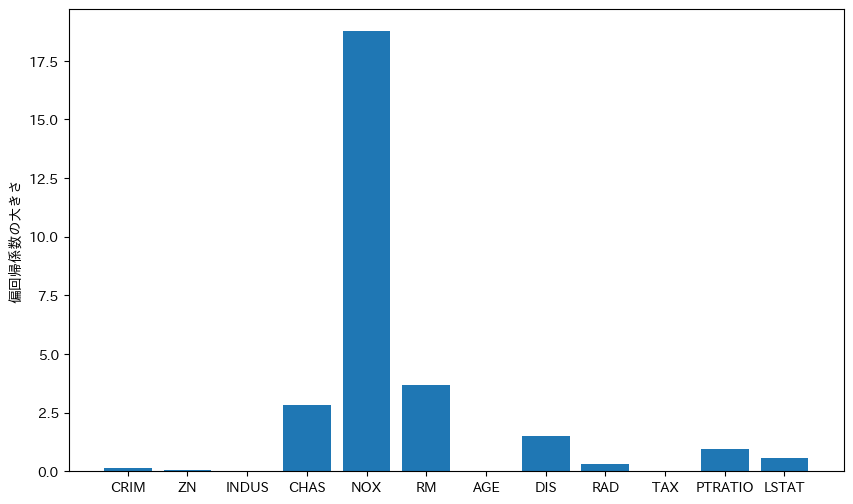

In [12]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import japanize_matplotlib

# データフレームdfから列名を取り出して、リスト型変数にする
col_names = list(df.columns)
# 目的変数の列名PRICEを取り除く説明変数
col_names.remove('PRICE')
print('説明変数')
print(col_names)

x = df[col_names]
x = x.to_numpy() # NumPy配列へ変換
print('説明変数xの形状:', x.shape)

# 目的変数
# データフレームdfから、列名PRICEのデータを取り出す。
y_true = df['PRICE']
y_true = y_true.to_numpy() # NumPy配列へ変換
print('目的変数y_trueの形状:', y_true.shape)

# 線形重回帰分析クラスのインスタンス生成
model5 = LinearRegression()

# 重回帰分析実行
model5.fit(x, y_true)

w0=model5.intercept_ # model5がもつ切片の値をw0に代入
print('切片:', w0)

w=model5.coef_      # model5がもつ偏回帰係数の値をwに代入
print('偏回帰係数')
for i in range(len(col_names)):
    name = col_names[i]
    print(name + ':', w[i])

# 偏回帰係数の大きさをグラフにする
w_abs=np.abs(w) # NumPyの関数absを使い、偏回帰係数の絶対値を計算

plt.figure(figsize=(10, 6))
left=np.arange(len(w_abs)) # 横軸の数値
# 横軸の数値、縦軸の値、横軸ラベルを指定して棒グラフを作成
plt.bar(left,height=w_abs, tick_label=col_names)
plt.ylabel('偏回帰係数の大きさ')
plt.show()

# 実習3.10：全説明変数による重回帰分析（標準化あり）

切片: 22.532806324110673
偏回帰係数
CRIM: -1.043097417683981
ZN: 1.0942203146182583
INDUS: 0.09230179601003752
CHAS: 0.7206282562015145
NOX: -2.1714870661915695
RM: 2.5677161155408066
AGE: 0.10153690889631872
DIS: -3.135991650631596
RAD: 2.5174289567924664
TAX: -2.135271462549667
PTRATIO: -2.0277010229588526
LSTAT: -3.938105171165487


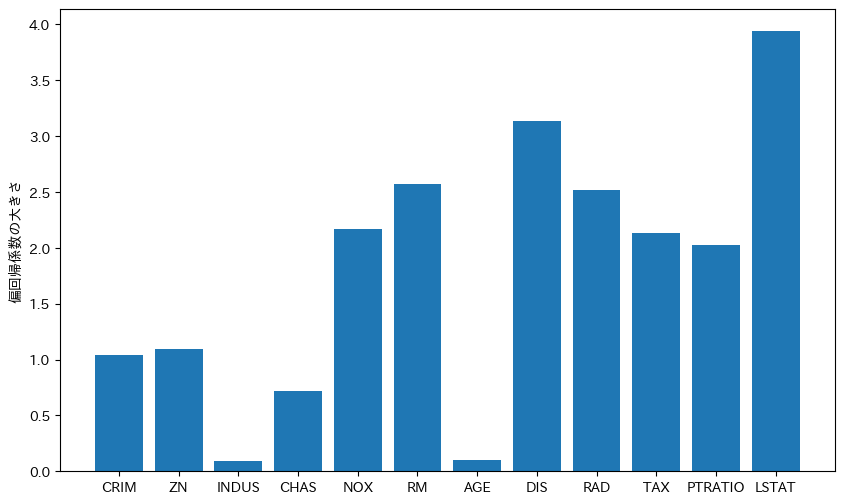

In [14]:
from sklearn.linear_model import LinearRegression

# 標準化を行うクラスのインスタンスを生成
scaler=StandardScaler()

# 各説明変数を標準化
x_std=scaler.fit_transform(x)

# 線形重回帰分析クラスのインスタンス生成
model6 = LinearRegression()

# 重回帰分析実行
model6.fit(x_std, y_true)

w0=model6.intercept_ # model6がもつ切片の値をw0に代入
print('切片:', w0)

w=model6.coef_      # model6がもつ偏回帰係数の値をwに代入
print('偏回帰係数')
for i in range(len(col_names)):
    name = col_names[i]
    print(name + ':', w[i])

# 偏回帰係数の大きさをグラフにする
w_abs=np.abs(w) # NumPyの関数absを使い、偏回帰係数の絶対値を計算

plt.figure(figsize=(10, 6))
left=np.arange(len(w_abs)) # 横軸の数値
# 横軸の数値、縦軸の値、横軸ラベルを指定して棒グラフを作成
plt.bar(left,height=w_abs, tick_label=col_names)
plt.ylabel('偏回帰係数の大きさ')
plt.show()